In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings('ignore')

from digits import load_images, rawpixel
from sklearn.datasets import load_digits

import sys
import numpy
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, GridSearchCV

In [2]:
fout = open('features.txt', 'w')
images = load_images('digits/', fout)
fout.close

Loading images...
Extracting dummy features
Done. Take a look into features.txt


<function TextIOWrapper.close()>

In [3]:
!cat features.txt

# não tem nada em features.txt!!

Não consegui importar os dados pela função disponibilizada :(
Portanto, utilizei o
```
load_digits()
```

do scikit-learn, classe `datasets`

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.figure(figsize=(16,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",fontdict={'fontsize':26})

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [5]:
X = load_digits().data
y = load_digits().target
class_names = load_digits().target_names

In [6]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.5, random_state = 5)

In [7]:
neigh = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)


Acurácia na base de validação: 98.55000000000001%




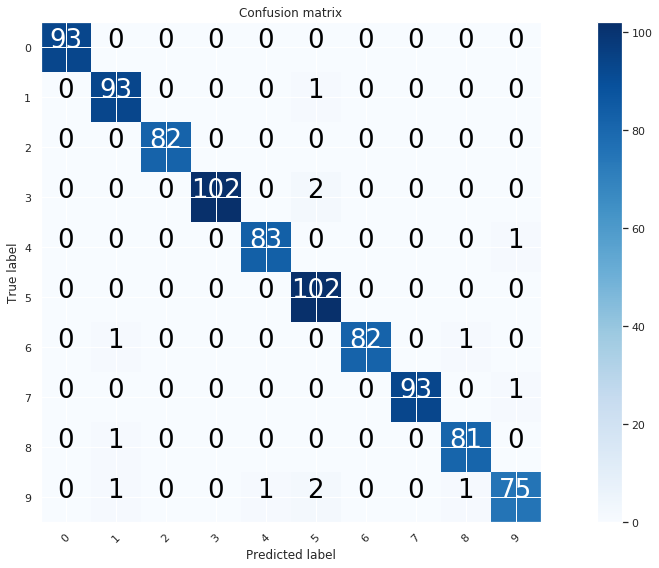

In [8]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print('\nAcurácia na base de validação: {}%\n\n'.format(100*round(accuracy_score(y_test, y_pred), 4)))
plot_confusion_matrix(cnf_matrix, classes=class_names)

Para a sua melhor solução, verifique se é possível melhorar o resultados mudando os valores
de k e métrica de distância

In [9]:
param_grid = {'n_neighbors': range(1,3),
              'weights': ['uniform', 'distance'],
              'leaf_size': range(10, 31, 10),
              'metric': ['euclidean', 'minkowski']} #, 'chebyshev', 'manhattan', 'wminkowski', 'seuclidean', 'mahalanobis']}

In [10]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [11]:
grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=cv)

In [12]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 3), 'weights': ['uniform', 'distance'], 'leaf_size': range(10, 31, 10), 'metric': ['euclidean', 'minkowski']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
grid.grid_scores_

/home/jayme/miniconda3/envs/ds/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.97884, std: 0.00896, params: {'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.97884, std: 0.00896, params: {'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.97439, std: 0.00758, params: {'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.97884, std: 0.00896, params: {'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.97884, std: 0.00896, params: {'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.97884, std: 0.00896, params: {'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.97439, std: 0.00758, params: {'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.97884, std: 0.00896, params: {'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.97884, std: 0.00896, params

In [14]:
grid.best_score_, grid.best_params_

(0.9788418708240535,
 {'leaf_size': 10,
  'metric': 'euclidean',
  'n_neighbors': 1,
  'weights': 'uniform'})


Acurácia na base de validação: 98.78%




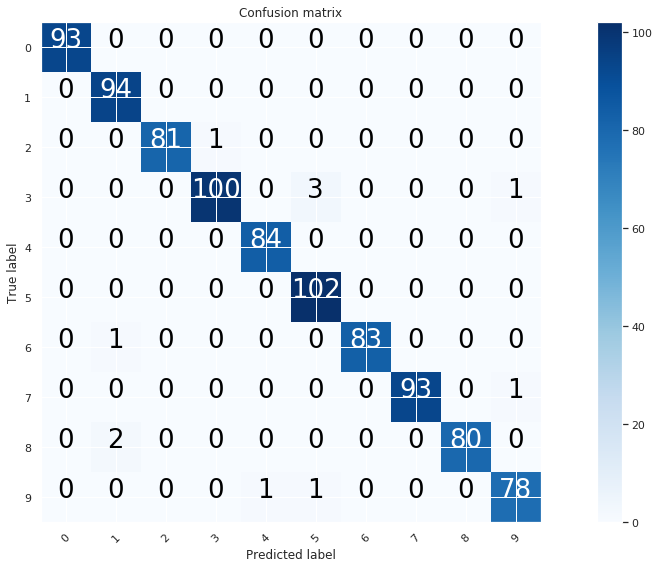

In [15]:
new_y_pred = grid.predict(X_test)
new_cnf_matrix = confusion_matrix(y_test, new_y_pred)
print('\nAcurácia na base de validação: {}%\n\n'.format(100*round(accuracy_score(y_test, new_y_pred), 4)))
plot_confusion_matrix(new_cnf_matrix, classes=class_names)